In [2]:
!pip install tensorflow_decision_forests

     |████████████████████████████████| 6.3 MB 850 kB/s eta 0:00:01     |█▎                              | 256 kB 850 kB/s eta 0:00:08
     |████████████████████████████████| 458.3 MB 9.9 kB/s  eta 0:00:01     |███████████████████▊            | 283.1 MB 39.6 MB/s eta 0:00:05     |████████████████████████████▊   | 412.1 MB 47.4 MB/s eta 0:00:01��███████████▎| 447.5 MB 43.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 51.5 MB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 13.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 14.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 47.8 MB/s eta 0:00:01
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30702 sha256=de62ac03a636cef613298e5532259c2e936f1f1c05586bb1442b15bee5766036
  Stored in directory: /root/.cache/pip/wheels/98/91/04/971b4c587cf47ae952b108949b46926f426c02832d120a082a
Successful

In [3]:
!pip install wurlitzer

In [1]:
import tensorflow_decision_forests as tfdf
import numpy as np
import pandas as pd
import tensorflow as tf
# Check the version of TensorFlow Decision Forests
print("Found TensorFlow Decision Forests v" + tfdf.__version__)

ModuleNotFoundError: No module named 'tensorflow_decision_forests'

In [6]:
# Read in the data
train = pd.read_csv('../input/tabular-playground-series-sep-2021/train.csv',index_col=0)
test  = pd.read_csv('../input/tabular-playground-series-sep-2021/test.csv', index_col=0)
train.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
id,,,,,,,,,,,,,,,,,,,,,
0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,86.489,...,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,9953.600,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,15827.000,...,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1
3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,-36.837,...,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486,1
4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,144.120,...,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,1


As we see the dataset contains numerical and null values. TF-DF supports all types of features (i.e., numerical, categorial and null/missing) and we don't need to any data preprocessing (e.g., one-hot-encoding, normalization). 

Labesl: Keras metrics expect integers. The label (```claim```) is already stored as integer, so we don't need to do any additional work here. 

In [7]:
#creating a new column 'nan_count' that counts nan values per row
#train['nan_count']=train.isnull().sum(axis=1)
#test['nan_count']=test.isnull().sum(axis=1)

In [8]:
#splitting train and validation data
xtrain = train.sample(frac=0.3, random_state=0)
valid = train.drop(xtrain.index).sample(frac=0.05, random_state=0)

In [9]:
#cheking total numbers in each categories
xtrain['claim'].value_counts().to_frame().T

,0,1
claim,143911,143465


In [10]:

valid['claim'].value_counts().to_frame().T

,0,1
claim,16951,16576


In [11]:
#filling nan values with 0
#xtrain=xtrain.fillna(0)
#valid_data=valid.fillna(0)
#test=test.fillna(0)

In [12]:
# Convert pandas dataframe into a TensorFlow dataset.
train_tfds = tfdf.keras.pd_dataframe_to_tf_dataset(xtrain, label='claim')
valid_tfds = tfdf.keras.pd_dataframe_to_tf_dataset(valid, label='claim')
test_tfds = tfdf.keras.pd_dataframe_to_tf_dataset(test)

In [13]:
%%time

# Train a Random Forest model.
#model = tfdf.keras.RandomForestModel()

# Train a Gradient Boosted Trees model.
model = tfdf.keras.GradientBoostedTreesModel(num_trees=500)
model.compile(metrics=["accuracy"])
model.fit(x=train_tfds, validation_data=valid_tfds)

4491/4491 [==============================] - 279s 61ms/step - val_loss: 0.0000e+00 - val_accuracy: 0.7739
CPU times: user 7min 52s, sys: 4.39 s, total: 7min 57s
Wall time: 4min 40s


In [14]:
model.summary()

Model: "gradient_boosted_trees_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (119):
	f1
	f10
	f100
	f101
	f102
	f103
	f104
	f105
	f106
	f107
	f108
	f109
	f11
	f110
	f111
	f112
	f113
	f114
	f115
	f116
	f117
	f118
	f12
	f13
	f14
	f15
	f16
	f17
	f18
	f19
	f2
	f20
	f21
	f22
	f23
	f24
	f25
	f26
	f27
	f28
	f29
	f3
	f30
	f31
	f32
	f33
	f34
	f35
	f36
	f37
	f38
	f39
	f4
	f40
	f41
	f42
	f43
	f44
	f45
	f46
	f47
	f48
	f49
	f5
	f50
	f51
	f52
	f53
	f54
	f55
	f56
	f57
	f58
	f59
	f6
	f60
	f61
	f62
	f63
	f64
	f65
	f66
	f67
	f68
	f69
	f7
	f70
	f71
	f72
	f73
	f74
	f75
	f76
	f77
	f78
	f79
	f8
	f80
	f81
	f82
	f83
	f84
	f85
	f86
	f87
	f88
	f89
	f9
	f90
	f91
	f92
	f93
	f94
	f95
	f96
	f97
	f98
	f99
	nan_count



In [15]:
# The input features
model.make_inspector().features()

["f1" (1; #0),
 "f10" (1; #1),
 "f100" (1; #2),
 "f101" (1; #3),
 "f102" (1; #4),
 "f103" (1; #5),
 "f104" (1; #6),
 "f105" (1; #7),
 "f106" (1; #8),
 "f107" (1; #9),
 "f108" (1; #10),
 "f109" (1; #11),
 "f11" (1; #12),
 "f110" (1; #13),
 "f111" (1; #14),
 "f112" (1; #15),
 "f113" (1; #16),
 "f114" (1; #17),
 "f115" (1; #18),
 "f116" (1; #19),
 "f117" (1; #20),
 "f118" (1; #21),
 "f12" (1; #22),
 "f13" (1; #23),
 "f14" (1; #24),
 "f15" (1; #25),
 "f16" (1; #26),
 "f17" (1; #27),
 "f18" (1; #28),
 "f19" (1; #29),
 "f2" (1; #30),
 "f20" (1; #31),
 "f21" (1; #32),
 "f22" (1; #33),
 "f23" (1; #34),
 "f24" (1; #35),
 "f25" (1; #36),
 "f26" (1; #37),
 "f27" (1; #38),
 "f28" (1; #39),
 "f29" (1; #40),
 "f3" (1; #41),
 "f30" (1; #42),
 "f31" (1; #43),
 "f32" (1; #44),
 "f33" (1; #45),
 "f34" (1; #46),
 "f35" (1; #47),
 "f36" (1; #48),
 "f37" (1; #49),
 "f38" (1; #50),
 "f39" (1; #51),
 "f4" (1; #52),
 "f40" (1; #53),
 "f41" (1; #54),
 "f42" (1; #55),
 "f43" (1; #56),
 "f44" (1; #57),
 "f45" (1

In [16]:
# The feature importances
model.make_inspector().variable_importances()

{'SUM_SCORE': [("nan_count" (1; #118), 112283.19612950897),
  ("f40" (1; #53), 324.4249226135162),
  ("f34" (1; #46), 305.52024542756635),
  ("f36" (1; #48), 253.69720362558564),
  ("f47" (1; #60), 207.1511475251682),
  ("f96" (1; #114), 202.75432429840657),
  ("f3" (1; #41), 202.0607098730634),
  ("f70" (1; #86), 200.83968727026604),
  ("f45" (1; #58), 196.6776600045241),
  ("f95" (1; #113), 189.29121411348524),
  ("f21" (1; #32), 179.92710277072365),
  ("f65" (1; #80), 162.54674425028588),
  ("f35" (1; #47), 155.16729978785042),
  ("f1" (1; #0), 147.80330696080273),
  ("f57" (1; #71), 137.39135856390658),
  ("f107" (1; #9), 135.94216561918893),
  ("f16" (1; #26), 132.30432973691586),
  ("f78" (1; #94), 129.45575085387418),
  ("f28" (1; #39), 123.54595290737507),
  ("f31" (1; #43), 122.76140918616056),
  ("f32" (1; #44), 120.9426302249758),
  ("f8" (1; #96), 114.73145588010448),
  ("f71" (1; #87), 112.49003659043183),
  ("f77" (1; #93), 106.72512812065906),
  ("f5" (1; #63), 106.38938

In [17]:
evaluation = model.evaluate(test, return_dict=True)
print()

for name, value in evaluation.items():
    print(f"{name}: {value: .4f}")

7711/7711 [==============================] - 61s 8ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00

loss:  0.0000
accuracy:  0.0000


In [18]:
#save the model
model.save("/tmp/my_saved_model1")

In [19]:
#plot the model
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

In [20]:
model.make_inspector().evaluation()

Evaluation(num_examples=None, accuracy=0.7771499752998352, loss=1.0105122327804565, rmse=None, ndcg=None, aucs=None)

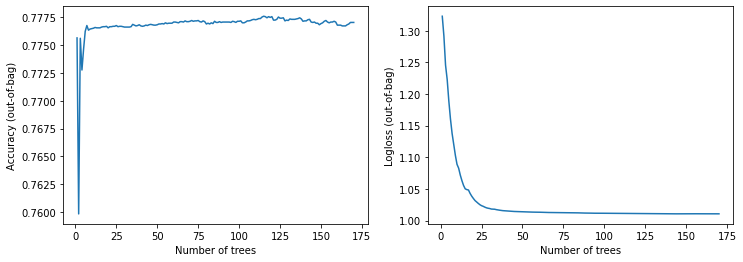

In [21]:
import matplotlib.pyplot as plt
logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")
plt.show()

In [32]:
train = pd.read_csv('../input/tabular-playground-series-sep-2021/train.csv',index_col=0)


In [36]:
#creating a new column 'nan_count' that counts nan values per row
#train['nan_count']=train.isnull().sum(axis=1)

#xtrain = train.sample(frac=0.3, random_state=0)
#valid = train.drop(xtrain.index).sample(frac=0.05, random_state=0)
#valid_data = valid.fillna(0)

In [38]:
predictions = model.predict(valid_tfds)
y_true      = valid["claim"]

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_true, predictions)
print("The ROC AUC score is %.5f" % ROC_AUC )

The ROC AUC score is 0.81405


In [39]:
sample = pd.read_csv('../input/tabular-playground-series-sep-2021/sample_solution.csv')
sample['claim'] = model.predict(test)

In [40]:
sample.to_csv('submission.csv',index=False)

### Reference: 
https://www.kaggle.com/carlmcbrideellis/classification-using-tensorflow-decision-forests

https://www.tensorflow.org/decision_forests/tutorials/beginner_colab